## Replace Numbers With Names

In [23]:
import json
import re

# Load the mapping from the JSON file
with open("numbers.json", "r") as file:
    numbers_dict = json.load(file)

# Read the content of the text file
with open("/Users/georgevengrovski/Documents/PersonalProjects/imessage_analysis/Righties gc (gyatt chat) - 389.txt", "r") as file:
    content = file.readlines()

# Function to replace numbers with names in a line of text
def replace_numbers_with_names(line, numbers_dict):
    # Use regex to find all potential phone numbers in the line
    for number in re.findall(r'\+\d+', line):
        # Replace each found number with the corresponding name if it exists in the dictionary
        if number in numbers_dict:
            line = line.replace(number, numbers_dict[number])
    return line

# Function to replace any emails with names in a line of text
def replace_emails_with_names(line, numbers_dict):
    # Use regex to find all potential emails in the line
    for email in re.findall(r'\b[A-Za-z0-9._%+-]+\b', line):
        # Replace each found email with the corresponding name if it exists in the dictionary
        if email in numbers_dict:
            line = line.replace(email, numbers_dict[email])
    return line

# Replace numbers and iCloud emails with names using the numbers_dict for each line in the content
updated_content = [replace_emails_with_names(replace_numbers_with_names(line, numbers_dict), numbers_dict) for line in content]

# Save the updated content to a new file
with open("output.txt", "w") as file:
    file.writelines(updated_content)

## Generate Pandas Database

In [24]:
import pandas as pd
import re
import json

# Load the mapping from the JSON file
with open("numbers.json", "r") as file:
    numbers_dict = json.load(file)

def parse_text_file(file_path, remove_file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Load numbers to remove
    with open(remove_file_path, 'r') as file:
        remove_numbers = file.read().split(', ')
    
    blocks = []
    current_block = []

    for line in lines:
        # Normalize the line
        line = line.rstrip()

        # Check if the line is empty or a known separator (adjust according to your data)
        if line == '' or line == '---':
            if current_block:
                blocks.append('\n'.join(current_block).strip())
                current_block = []
        else:
            current_block.append(line)

    if current_block:
        blocks.append('\n'.join(current_block).strip())

    # Prepare lists to hold column data
    date_times = []
    read_latencies = []
    senders = []
    message_contents = []
    all_reactions = []

    # Improved regex to capture date-time and read latency
    datetime_latency_regex = re.compile(r"^(.*?)(?:\s+\(Read by you after (.*?)\))?$")

    for block in blocks:
        lines = block.split('\n')
        if not lines:
            continue

        # Extract date-time and read latency
        datetime_latency_match = datetime_latency_regex.match(lines[0])
        if datetime_latency_match:
            date_times.append(datetime_latency_match.group(1).strip())
            read_latencies.append(datetime_latency_match.group(2) if datetime_latency_match.group(2) else '')

        # Extract sender
        sender = lines[1] if len(lines) > 1 else ''
        if sender in remove_numbers:
            continue  # Skip adding this block to the dataframe if sender should be removed

        # Set sender to "UNKNOWN" if not in numbers_dict values
        if sender not in numbers_dict.values():
            sender = "UNKNOWN"

        senders.append(sender)

        remaining_block = lines[2:]

        # Extract message content and reactions
        message_content = []
        reaction_dict = {}
        in_reactions = False

        for line in remaining_block:
            if line.startswith("Reactions:"):
                in_reactions = True
                continue
            if in_reactions:
                try:
                    reaction_type, name = line.split(' by ')
                    if reaction_type not in reaction_dict:
                        reaction_dict[reaction_type] = []
                    reaction_dict[reaction_type].append(name)
                except ValueError:
                    continue
            else:
                message_content.append(line)

        message_contents.append(' '.join(message_content))
        all_reactions.append(reaction_dict)

    # Ensure all lists are of the same length by filling missing values
    max_length = max(len(date_times), len(read_latencies), len(senders), len(message_contents), len(all_reactions))
    date_times += [''] * (max_length - len(date_times))
    read_latencies += [''] * (max_length - len(read_latencies))
    senders += [''] * (max_length - len(senders))
    message_contents += [''] * (max_length - len(message_contents))
    all_reactions += [{}] * (max_length - len(all_reactions))

    # Create DataFrame
    df = pd.DataFrame({
        'date-time': date_times,
        'read_latency': read_latencies,
        'sender': senders,
        'message_content': message_contents,
        'reactions': all_reactions
    })

    return df

# Example usage
file_path = 'output.txt'
remove_file_path = 'remove.txt'
df = parse_text_file(file_path, remove_file_path)
df.to_csv('formatted_output.csv', index=False)

## Reactions Analysis!

### Most Raw Reactions Recieved:

In [25]:
import pandas as pd

# Load the data from CSV
df = pd.read_csv('formatted_output.csv')

# Initialize the dictionary to collect reactions
raw_reactions_received = {
    "George Vengrovski": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Alec Matulka": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Gian Rodrigues": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Ezana Girmay": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Jacob Guenther": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Josh Lester": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Krithik Duraisamy": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Lamek Mekonen": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Mackey Guenther": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Themba Kimani": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0},
    "Josh Paul": {"Emphasized":0, "Disliked":0, "Loved":0, "Questioned":0, "Laughed":0, "total_messages_sent":0}
}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Convert the string representation of dictionary to actual dictionary
    reactions_dict = eval(row['reactions'])
    
    # Update the reaction counts for the sender
    sender = row['sender']
    if sender in raw_reactions_received:
        raw_reactions_received[sender]["total_messages_sent"] += 1
        for reaction_type, names in reactions_dict.items():
            if reaction_type in raw_reactions_received[sender]:
                raw_reactions_received[sender][reaction_type] += len(names)
# Example to see the output
print(raw_reactions_received)

{'George Vengrovski': {'Emphasized': 1191, 'Disliked': 334, 'Loved': 964, 'Questioned': 27, 'Laughed': 6425, 'total_messages_sent': 16813}, 'Alec Matulka': {'Emphasized': 454, 'Disliked': 129, 'Loved': 389, 'Questioned': 10, 'Laughed': 3170, 'total_messages_sent': 3418}, 'Gian Rodrigues': {'Emphasized': 1537, 'Disliked': 267, 'Loved': 670, 'Questioned': 33, 'Laughed': 4540, 'total_messages_sent': 14753}, 'Ezana Girmay': {'Emphasized': 229, 'Disliked': 90, 'Loved': 124, 'Questioned': 12, 'Laughed': 1298, 'total_messages_sent': 1579}, 'Jacob Guenther': {'Emphasized': 406, 'Disliked': 34, 'Loved': 272, 'Questioned': 7, 'Laughed': 1337, 'total_messages_sent': 3041}, 'Josh Lester': {'Emphasized': 521, 'Disliked': 65, 'Loved': 429, 'Questioned': 7, 'Laughed': 1890, 'total_messages_sent': 4886}, 'Krithik Duraisamy': {'Emphasized': 65, 'Disliked': 14, 'Loved': 44, 'Questioned': 2, 'Laughed': 440, 'total_messages_sent': 499}, 'Lamek Mekonen': {'Emphasized': 685, 'Disliked': 160, 'Loved': 388, '

### Analysis of HaHas

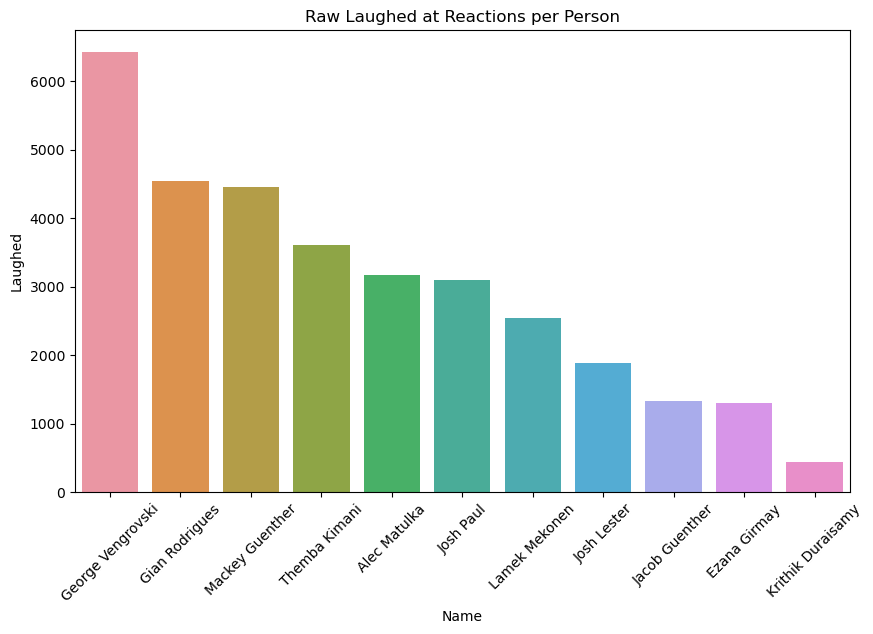

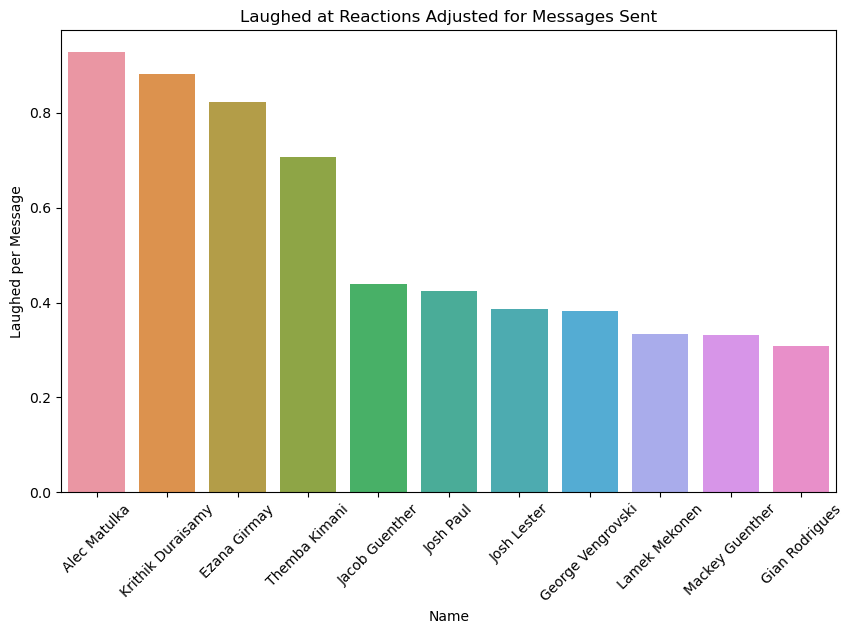

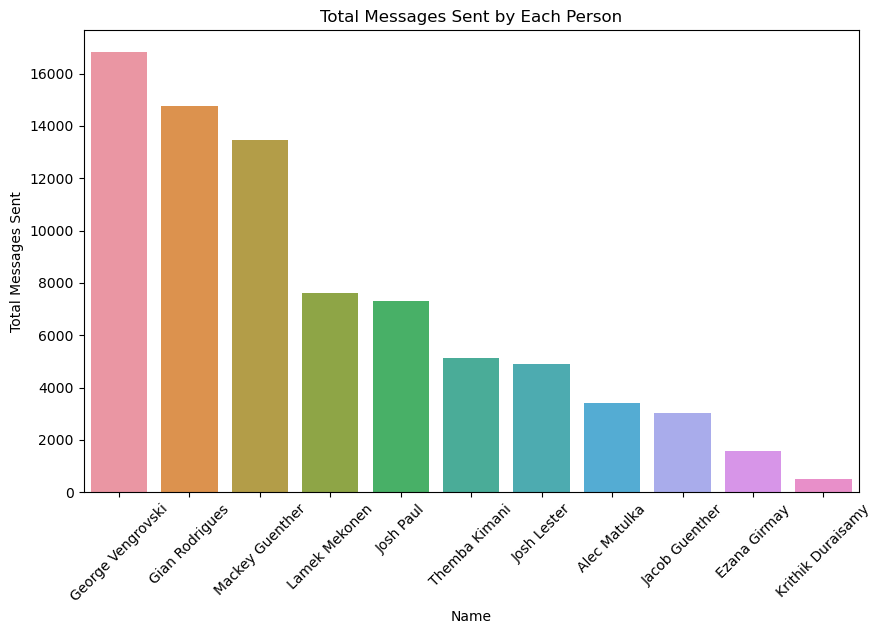

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Laughed at reactions per person
plt.figure(figsize=(10, 6))
df_sorted_laughed = df_reactions.sort_values('Laughed', ascending=False)
sns.barplot(data=df_sorted_laughed, x='Name', y='Laughed')
plt.title('Raw Laughed at Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Laughed at reactions adjusted for messages sent
df_reactions['Laughed per Message'] = df_reactions['Laughed'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_laughed_per_message = df_reactions.sort_values('Laughed per Message', ascending=False)
sns.barplot(data=df_sorted_laughed_per_message, x='Name', y='Laughed per Message')
plt.title('Laughed at Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

# Plot for total messages sent
plt.figure(figsize=(10, 6))
df_sorted_total_messages = df_reactions.sort_values('Total Messages Sent', ascending=False)
sns.barplot(data=df_sorted_total_messages, x='Name', y='Total Messages Sent')
plt.title('Total Messages Sent by Each Person')
plt.xticks(rotation=45)
plt.show()

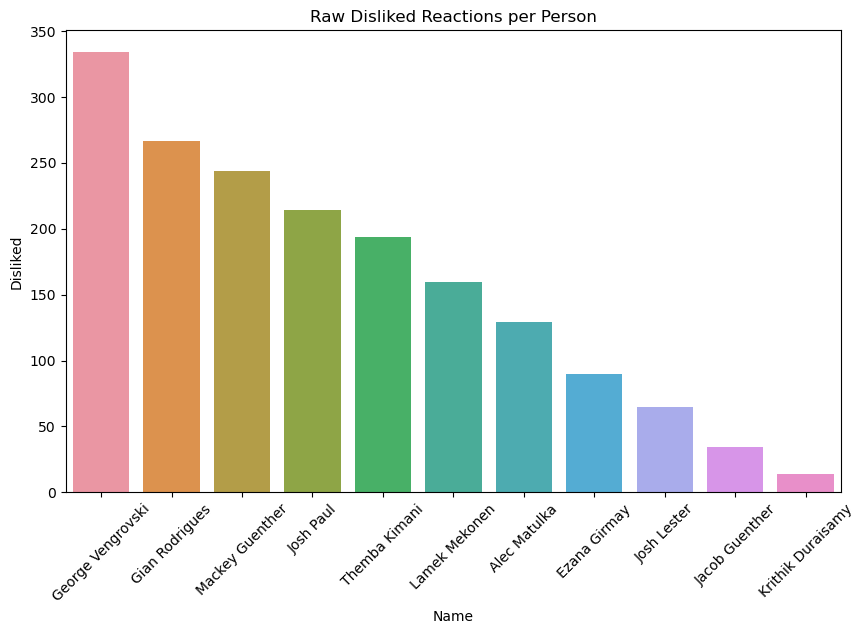

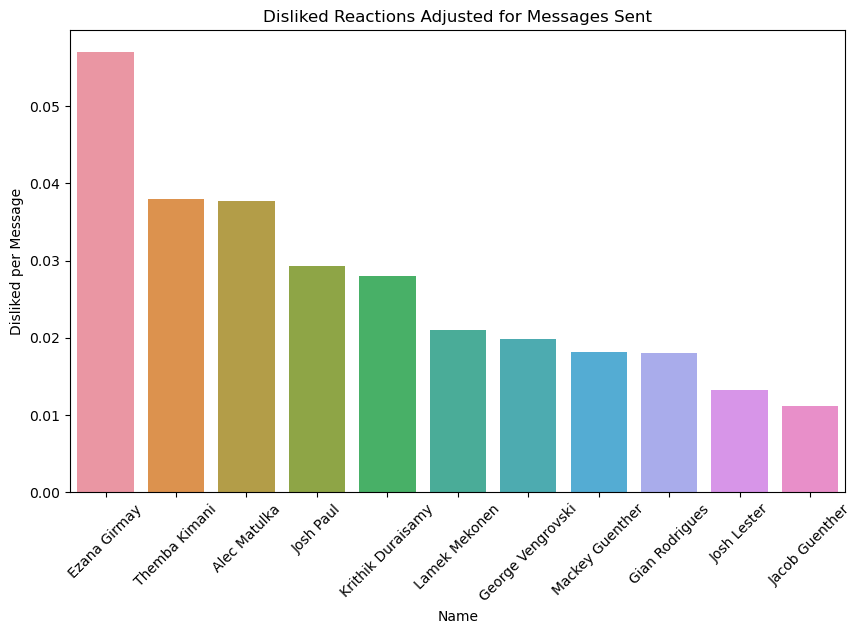

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Disliked reactions per person
plt.figure(figsize=(10, 6))
df_sorted_disliked = df_reactions.sort_values('Disliked', ascending=False)
sns.barplot(data=df_sorted_disliked, x='Name', y='Disliked')
plt.title('Raw Disliked Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Disliked reactions adjusted for messages sent
df_reactions['Disliked per Message'] = df_reactions['Disliked'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_disliked_per_message = df_reactions.sort_values('Disliked per Message', ascending=False)
sns.barplot(data=df_sorted_disliked_per_message, x='Name', y='Disliked per Message')
plt.title('Disliked Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

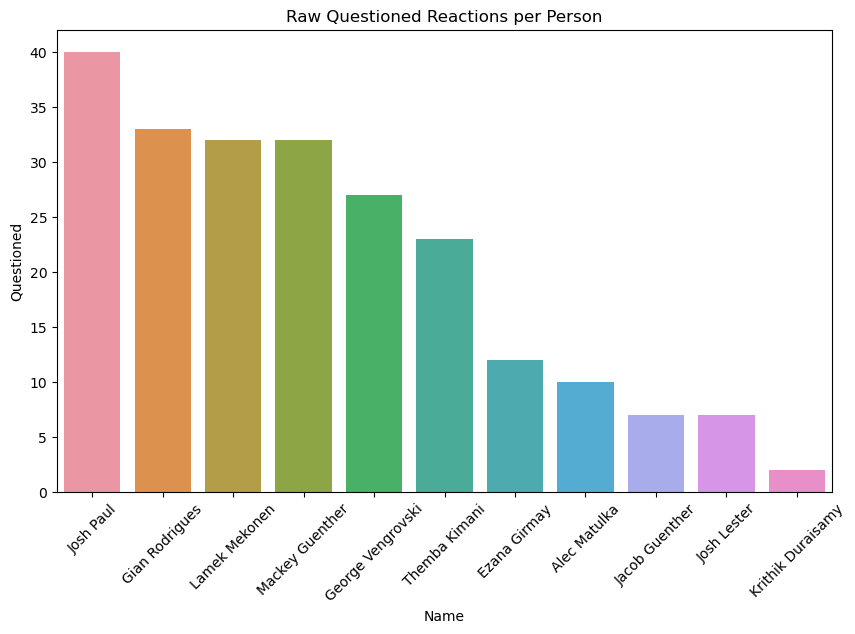

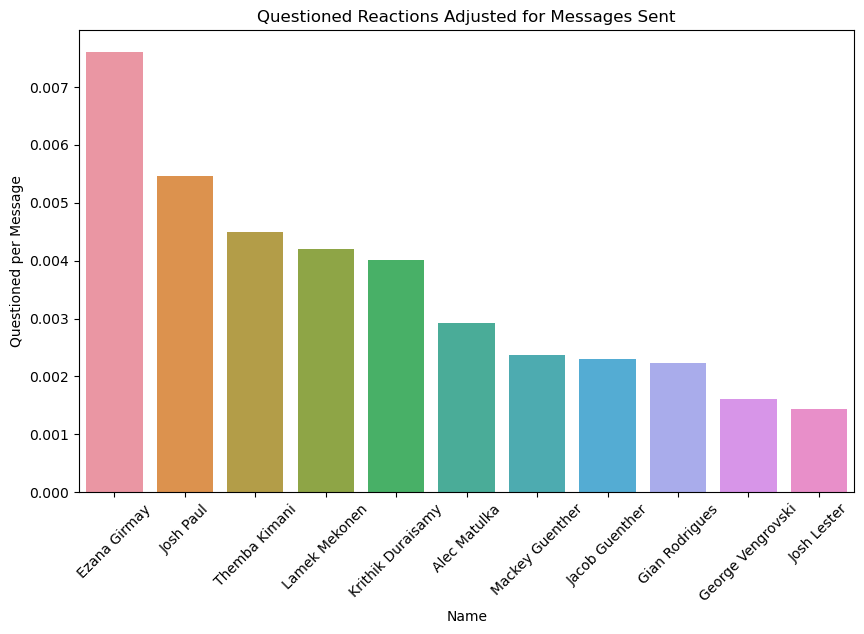

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary to DataFrame
data = {
    "Name": [],
    "Emphasized": [],
    "Disliked": [],
    "Loved": [],
    "Questioned": [],
    "Laughed": [],
    "Total Messages Sent": []
}

for name, reactions in raw_reactions_received.items():
    data["Name"].append(name)
    data["Emphasized"].append(reactions["Emphasized"])
    data["Disliked"].append(reactions["Disliked"])
    data["Loved"].append(reactions["Loved"])
    data["Questioned"].append(reactions["Questioned"])
    data["Laughed"].append(reactions["Laughed"])
    data["Total Messages Sent"].append(reactions["total_messages_sent"])

df_reactions = pd.DataFrame(data)

# Plot for raw Questioned reactions per person
plt.figure(figsize=(10, 6))
df_sorted_questioned = df_reactions.sort_values('Questioned', ascending=False)
sns.barplot(data=df_sorted_questioned, x='Name', y='Questioned')
plt.title('Raw Questioned Reactions per Person')
plt.xticks(rotation=45)
plt.show()

# Plot for Questioned reactions adjusted for messages sent
df_reactions['Questioned per Message'] = df_reactions['Questioned'] / df_reactions['Total Messages Sent']
plt.figure(figsize=(10, 6))
df_sorted_questioned_per_message = df_reactions.sort_values('Questioned per Message', ascending=False)
sns.barplot(data=df_sorted_questioned_per_message, x='Name', y='Questioned per Message')
plt.title('Questioned Reactions Adjusted for Messages Sent')
plt.xticks(rotation=45)
plt.show()

## Eleveners and Histograms!

In [30]:
import pandas as pd
import ast

# Load the data from CSV
df = pd.read_csv('formatted_output.csv')

# Initialize the dictionary to collect reactions
raw_reactions_received = {
    "Me": {"total_messages_sent": 0},
    "Alec Matulka": {"total_messages_sent": 0},
    "Gian Rodrigues": {"total_messages_sent": 0},
    "Ezana Girmay": {"total_messages_sent": 0},
    "Jacob Guenther": {"total_messages_sent": 0},
    "Josh Lester": {"total_messages_sent": 0},
    "Krithik Duraisamy": {"total_messages_sent": 0},
    "Lamek Mekonen": {"total_messages_sent": 0},
    "Mackey Guenther": {"total_messages_sent": 0},
    "Themba Kimani": {"total_messages_sent": 0},
    "Josh Paul": {"total_messages_sent": 0}
}

# List to store tuples of sender and message content for reactions > 10
excessive_reactions = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Convert the string representation of dictionary to actual dictionary
    reactions_dict = ast.literal_eval(row['reactions'])
    
    # Update the reaction counts for the sender
    sender = row['sender']
    if sender in raw_reactions_received:
        raw_reactions_received[sender]["total_messages_sent"] += 1
        num_reactions = 0 
        for reaction_type, names in reactions_dict.items():
            num_reactions += len(names)

            if len(names) >= 10:
                excessive_reactions.append((sender, row['message_content']))

        raw_reactions_received[sender][num_reactions] = raw_reactions_received[sender].get(num_reactions, 0) + 1

raw_reactions_received['George Vengrovski'] = raw_reactions_received['Me']
del raw_reactions_received['Me']

# Example to see the output
print(raw_reactions_received)
print(excessive_reactions)


{'Alec Matulka': {'total_messages_sent': 3418, 0: 1717, 6: 64, 1: 622, 2: 399, 4: 213, 3: 239, 5: 120, 7: 33, 9: 3, 8: 6, 10: 1, 11: 1}, 'Gian Rodrigues': {'total_messages_sent': 14753, 2: 1016, 1: 2392, 0: 10561, 3: 396, 4: 201, 5: 95, 6: 49, 7: 30, 10: 1, 8: 6, 9: 3, 11: 3}, 'Ezana Girmay': {'total_messages_sent': 1579, 0: 863, 2: 172, 1: 266, 4: 57, 5: 59, 6: 30, 3: 113, 8: 7, 7: 11, 11: 1}, 'Jacob Guenther': {'total_messages_sent': 3041, 0: 1965, 2: 235, 1: 556, 5: 39, 3: 115, 4: 82, 6: 22, 7: 18, 9: 3, 8: 6}, 'Josh Lester': {'total_messages_sent': 4886, 2: 354, 1: 804, 0: 3337, 4: 107, 3: 167, 5: 66, 6: 36, 7: 11, 8: 3, 9: 1}, 'Krithik Duraisamy': {'total_messages_sent': 499, 1: 77, 8: 7, 0: 288, 5: 21, 4: 17, 9: 3, 3: 30, 2: 46, 6: 8, 7: 2}, 'Lamek Mekonen': {'total_messages_sent': 7609, 0: 5345, 1: 1331, 2: 512, 3: 211, 5: 56, 4: 107, 6: 30, 7: 13, 9: 1, 8: 3}, 'Mackey Guenther': {'total_messages_sent': 13466, 0: 9666, 1: 2189, 2: 895, 3: 340, 4: 188, 5: 108, 7: 29, 9: 3, 6: 43,

NameError: name 'df_logged' is not defined

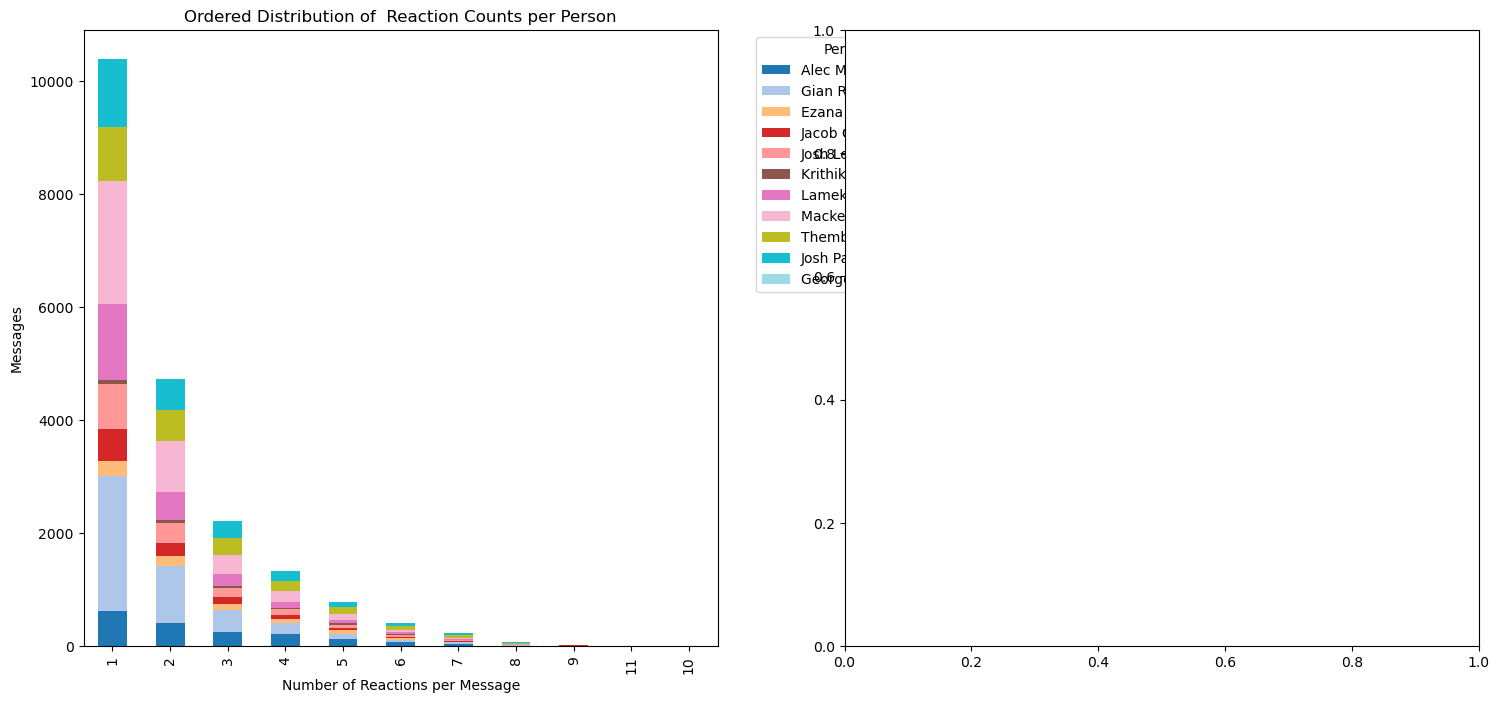

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting, excluding 'total_messages_sent' and reactions count '0'
data = {name: {k: v for k, v in reactions.items() if k != 'total_messages_sent' and k != 0} for name, reactions in raw_reactions_received.items()}
df = pd.DataFrame(data).fillna(0)

# Sum reactions for each person and sort
df['Total Reactions'] = df.sum(axis=1)
df_sorted = df.sort_values('Total Reactions', ascending=False)

# Drop the total reactions column for plotting
df_sorted.drop('Total Reactions', axis=1, inplace=True)


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Define a color map with more than 12 colors
color_map = plt.cm.get_cmap('tab20', 14)  # 'tab20' colormap with 14 unique colors

# df_sorted scale plot with stacked bars of logged data
df_sorted.plot(kind='bar', stacked=True, ax=ax1, colormap=color_map)
ax1.set_title('Ordered Distribution of  Reaction Counts per Person')
ax1.set_xlabel('Number of Reactions per Message')
ax1.set_ylabel('Messages')
ax1.legend(title='Person', bbox_to_anchor=(1.05, 1), loc='upper left')

# Logarithmic scale plot with stacked bars of logged data
df_sorted.plot(kind='bar', stacked=False, ax=ax2, colormap=color_map)
ax2.set_title('Ordered Distribution of Log-Scaled Reaction Counts per Person (Log Scale)')
ax2.set_xlabel('Number of Reactions per Message')
ax2.set_ylabel('Log-Count of Messages')
ax2.set_yscale('log', base=10)
ax2.legend(title='Person', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Giving and Recieving Haha's

## Interaction Graph

## Month Wise Activity of GroupChat

In [ ]:
df = pd.read_csv('formatted_output.csv')

# Convert 'date-time' column to datetime type, skipping errors
df['date-time'] = pd.to_datetime(df['date-time'], errors='coerce')

# Drop rows with NaT values in 'date-time' column
df.dropna(subset=['date-time'], inplace=True)

# Set the datetime column as the index
df.set_index('date-time', inplace=True)

# Resample the data by month and count the number of rows in each bin
monthly_counts = df.resample('M').size()

# Plotting the data with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size for better readability
monthly_counts.plot(kind='line', ax=ax, color='skyblue', title='Monthly Messages')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Messages')

# Correcting the x-axis labels to use FixedLocator for proper alignment
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.show()


## Circadian Analysis (cumalative count of messages per hour)

In [ ]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('formatted_output.csv')

# Convert 'date-time' column to datetime type, skipping errors
df['date-time'] = pd.to_datetime(df['date-time'], format='%b %d, %Y %I:%M:%S %p', errors='coerce')
# Drop rows with NaT values in 'date-time' column
df.dropna(subset=['date-time'], inplace=True)

# Adjust the datetime by adding 9 hours
df['date-time'] += pd.Timedelta(hours=9)

# Extract hour from the datetime column
df['hour'] = df['date-time'].dt.hour

# Group by hour and count the number of rows in each bin
hourly_counts = df.groupby('hour').size()

# Plotting the data with improved aesthetics
fig, ax = plt.subplots(figsize=(15, 6))  # Increase the figure size for better readability
hourly_counts.plot(kind='line', ax=ax, color='skyblue', title='Hourly Messages')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Messages')

# Generate labels for 12-hour clock format starting at 6 AM
hours_12hr = [(f"{(hour % 12 or 12)} {'AM' if hour < 12 else 'PM'}") for hour in range(24)]
# Adjust the list to start at 6 AM and wrap around
adjusted_hours_12hr = hours_12hr[6:] + hours_12hr[:6]

# Set x-axis ticks and labels
ax.set_xticks(range(24))  # Set ticks for each hour
ax.set_xticklabels(adjusted_hours_12hr, rotation=45)  # Set labels from the adjusted 12-hour list

plt.show()

In [ ]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('formatted_output.csv')

# Convert 'date-time' column to datetime type, skipping errors
df['date-time'] = pd.to_datetime(df['date-time'], format='%b %d, %Y %I:%M:%S %p', errors='coerce')
# Drop rows with NaT values in 'date-time' column
df.dropna(subset=['date-time'], inplace=True)

# Adjust the datetime by adding 9 hours
df['date-time'] += pd.Timedelta(hours=9)

# Extract hour and year from the datetime column
df['hour'] = df['date-time'].dt.hour
df['year'] = df['date-time'].dt.year

# Define pandemic and non-pandemic periods
df['period'] = df['year'].apply(lambda x: 'Pandemic' if x in [2020, 2021] else 'Non-Pandemic')

# Group by period and hour and count the number of rows in each bin
hourly_counts_by_period = df.groupby(['period', 'hour']).size().unstack(fill_value=0)

# Normalize the counts by the total number of messages sent in each period
total_messages_per_period = df['period'].value_counts()
normalized_hourly_counts_by_period = hourly_counts_by_period.div(total_messages_per_period, axis=0)

# Plotting the data with improved aesthetics
fig, ax = plt.subplots(figsize=(15, 6))  # Increase the figure size for better readability

# Plot a line for each period
for period in normalized_hourly_counts_by_period.index:
    normalized_hourly_counts_by_period.loc[period].plot(ax=ax, label=period)

ax.set_title('Normalized Hourly Messages by Period (Pandemic vs Non-Pandemic)')
ax.set_xlabel('Hour')
ax.set_ylabel('Proportion of Messages')
ax.legend(title='Period')

# Generate labels for 12-hour clock format starting at 6 AM
hours_12hr = [(f"{(hour % 12 or 12)} {'AM' if hour < 12 else 'PM'}") for hour in range(24)]
# Adjust the list to start at 6 AM and wrap around
adjusted_hours_12hr = hours_12hr[6:] + hours_12hr[:6]

# Set x-axis ticks and labels
ax.set_xticks(range(24))  # Set ticks for each hour
ax.set_xticklabels(adjusted_hours_12hr, rotation=45)  # Set labels from the adjusted 12-hour list

plt.show()

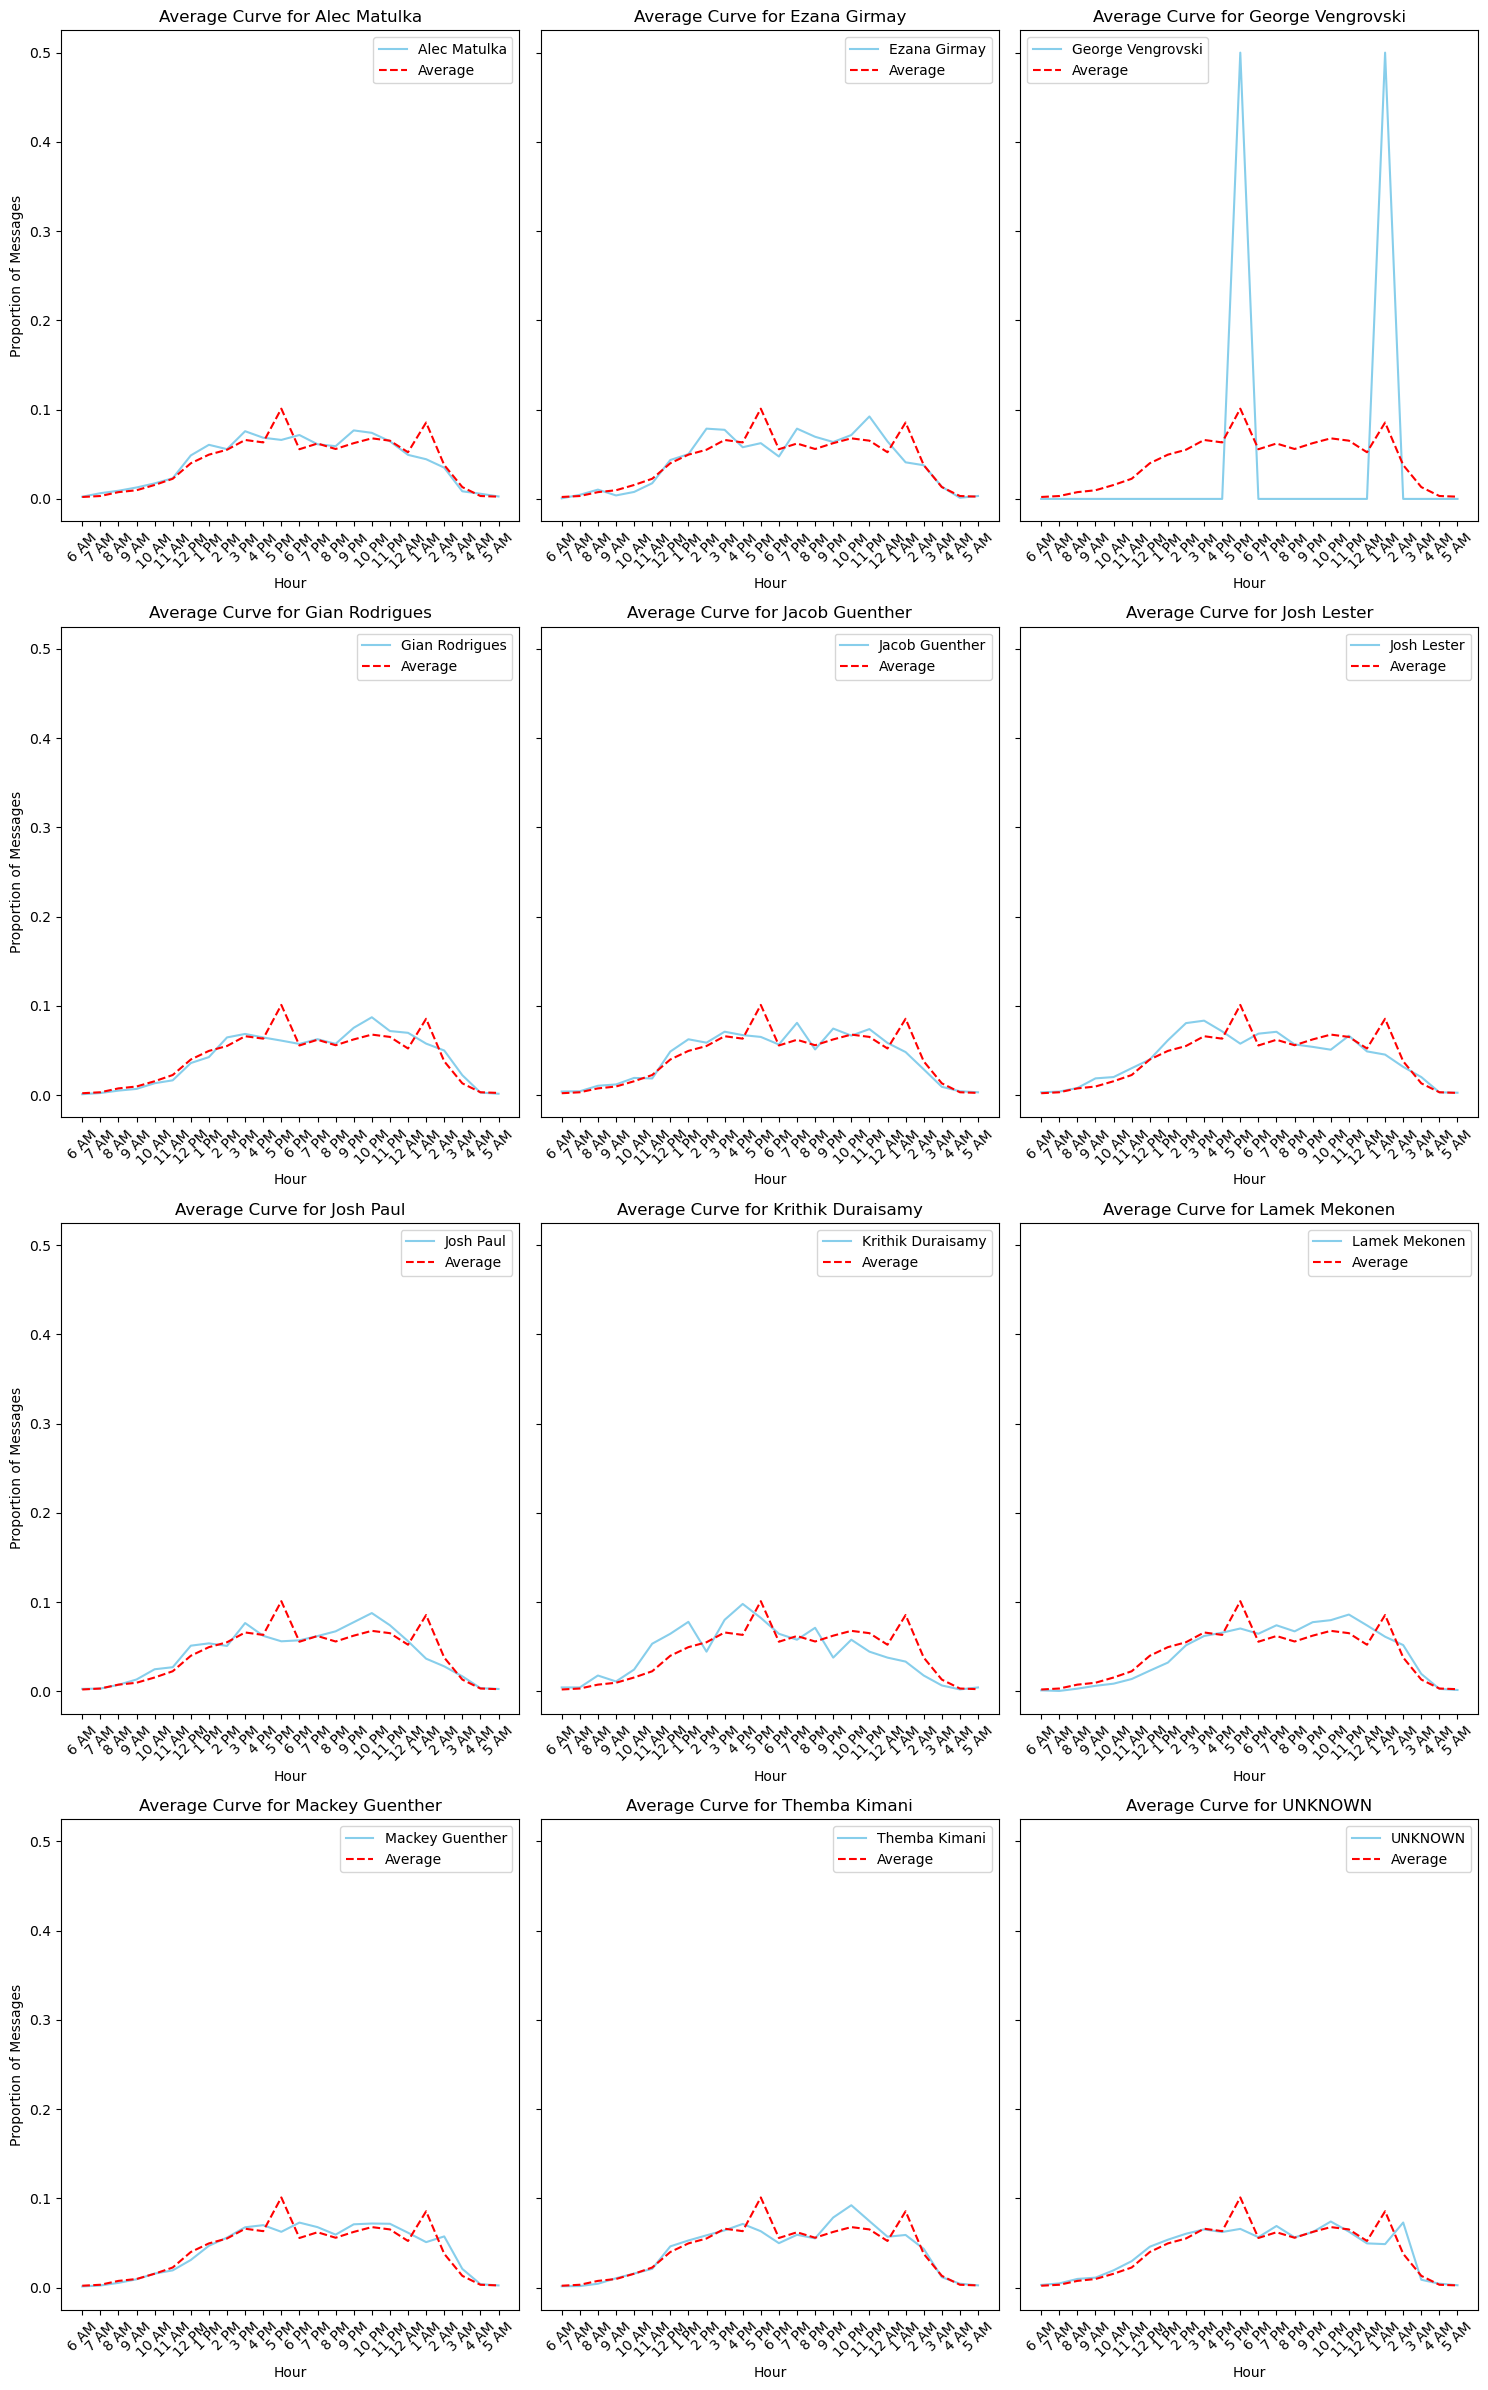

['Themba Kimani' 'UNKNOWN' 'Lamek Mekonen' 'Alec Matulka'
 'Mackey Guenther' 'Gian Rodrigues' 'Ezana Girmay' 'Josh Lester'
 'Jacob Guenther' 'Josh Paul' 'George Vengrovski' 'Krithik Duraisamy' nan]


In [13]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('formatted_output.csv')

# Convert 'date-time' column to datetime type, skipping errors
df['date-time'] = pd.to_datetime(df['date-time'], format='%b %d, %Y %I:%M:%S %p', errors='coerce')
# Drop rows with NaT values in 'date-time' column
df.dropna(subset=['date-time'], inplace=True)

# Adjust the datetime by adding 9 hours
df['date-time'] += pd.Timedelta(hours=9)

# Extract hour and sender from the datetime column
df['hour'] = df['date-time'].dt.hour
df['sender'] = df['sender']  # Assuming 'sender' column exists

# Group by sender and hour, then count the number of messages
hourly_counts_by_sender = df.groupby(['sender', 'hour']).size().unstack(fill_value=0)

# Normalize the counts by the total number of messages sent by each sender
total_messages_per_sender = df['sender'].value_counts()
normalized_hourly_counts_by_sender = hourly_counts_by_sender.div(total_messages_per_sender, axis=0)

# Calculate the average curve across all senders
average_curve = normalized_hourly_counts_by_sender.mean(axis=0)

# Determine the number of rows needed for a 3 x n grid
num_senders = len(normalized_hourly_counts_by_sender.index)
num_rows = (num_senders + 2) // 3  # Add 2 to ensure rounding up

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, sender in enumerate(normalized_hourly_counts_by_sender.index):
    normalized_hourly_counts_by_sender.loc[sender].plot(kind='line', ax=axes[i], title=f'Hourly Messages for {sender}', color='skyblue')
    average_curve.plot(kind='line', ax=axes[i], title=f'Average Curve for {sender}', color='red', linestyle='--')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Proportion of Messages')
    axes[i].legend([sender, 'Average'])

hours_12hr = [(f"{(hour % 12 or 12)} {'AM' if hour < 12 else 'PM'}") for hour in range(24)]
adjusted_hours_12hr = hours_12hr[6:] + hours_12hr[:6]

for ax in axes:
    ax.set_xticks(range(24))  # Set ticks for each hour
    ax.set_xticklabels(adjusted_hours_12hr, rotation=45)  # Set labels from the adjusted 12-hour list

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print out a list of unique senders
unique_senders = df['sender'].unique()
print(unique_senders)
